# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **6 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [4]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [5]:
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [6]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



### Caso 2

#### Codificación Ordinal

In [8]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [9]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
print(X_train.head())

         model      year  transmission   mileage  fuelType       tax  \
856   1.000000  0.727273      1.000000  0.209572       1.0  0.053097   
4709  0.117647  0.772727      0.333333  0.206390       1.0  0.000000   
2028  1.000000  0.909091      0.000000  0.084011       1.0  0.256637   
3295  0.000000  0.909091      0.333333  0.111669       1.0  0.256637   
924   1.000000  0.863636      0.333333  0.110557       1.0  0.256637   

           mpg  engineSize  
856   0.226529    0.288889  
4709  0.285099    0.222222  
2028  0.246770    0.333333  
3295  0.213178    0.266667  
924   0.231266    0.333333  


In [10]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



### Caso 3

#### Codificación One-Hot

In [11]:
df_ohe_2 = pd.get_dummies(df)
robust_scaler = RobustScaler()
df_scl_ohe_2 = robust_scaler.fit_transform(df_ohe_2)
df_scl_ohe_2 = pd.DataFrame(df_scl_ohe_2, columns = df_ohe_2.columns)
df_scl_ohe_2.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separación de Datos

In [12]:
X = df_scl_ohe_2.drop(['price'], axis=1)
y = df_scl_ohe_2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model_3 = LinearRegression()

model_3.fit(X_train, y_train)
preds = model_3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_3.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.277
R^2: 0.917



### Caso 4

#### Codificación Ordinal

In [13]:
oe_2 = OrdinalEncoder()
df_oe_2 = df.copy()
df_oe_2[str_categ] = oe_2.fit_transform(df_oe_2[str_categ])

x_2 = df_oe_2.values
robust_scaler_2 = RobustScaler()
x_scaled_2 = robust_scaler_2.fit_transform(x_2)
df_scl_oe_2 = pd.DataFrame(x_scaled_2, columns=df_oe_2.columns)
df_scl_oe_2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [14]:
X = df_scl_oe_2.drop(['price'], axis=1)
y = df_scl_oe_2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model_4 = LinearRegression()

model_4.fit(X_train, y_train)
preds = model_4.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_4.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.444
R^2: 0.787



### Caso 5

#### Codificación Ordinal

In [15]:
oe_5 = OrdinalEncoder()
df_oe_5 = df.copy()
df_oe_5[str_categ] = oe_5.fit_transform(df_oe_5[str_categ])

x_5 = df_oe_5.values #returns a numpy array
min_max_scaler_5 = MinMaxScaler()
x_scaled_5 = min_max_scaler_5.fit_transform(x_5)
df_scl_oe_5 = pd.DataFrame(x_scaled_5, columns=df_oe_5.columns)
df_scl_oe_5.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [16]:
X = df_scl_oe_5.drop(['price'], axis=1)
y = df_scl_oe_5['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=22)

model_5 = LinearRegression()

model_5.fit(X_train, y_train)
preds = model_5.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_5.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.049
R^2: 0.785



### Caso 6

#### Codificación Ordinal

In [17]:
oe_6 = OrdinalEncoder()
df_oe_6 = df.copy()
df_oe_6[str_categ] = oe_6.fit_transform(df_oe_6[str_categ])

x_6 = df_oe_6.values #returns a numpy array
min_max_scaler_6 = MinMaxScaler()
x_scaled_6 = min_max_scaler_6.fit_transform(x_6)
df_scl_oe_6 = pd.DataFrame(x_scaled_6, columns=df_oe_6.columns)
df_scl_oe_6.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [18]:
X = df_scl_oe_6.drop(['price'], axis=1)
y = df_scl_oe_6['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=22)

model_6 = LinearRegression()

model_6.fit(X_train, y_train)
preds = model_6.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_6.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.784



### Caso 7

#### Codificación Ordinal

In [19]:
oe_7 = OrdinalEncoder()
df_oe_7 = df.copy()
df_oe_7[str_categ] = oe_7.fit_transform(df_oe_7[str_categ])

x_7 = df_oe_7.values #returns a numpy array
min_max_scaler_7 = MinMaxScaler()
x_scaled_7 = min_max_scaler_7.fit_transform(x_7)
df_scl_oe_7 = pd.DataFrame(x_scaled_7, columns=df_oe_7.columns)
df_scl_oe_7.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [20]:
X = df_scl_oe_7.drop(['price'], axis=1)
y = df_scl_oe_7['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model_7 = LinearRegression()

model_7.fit(X_train, y_train)
preds = model_7.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_7.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [21]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [23]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

a=np.random.rand(len(X_train_array[0]))
b=X_train_array[0]
print(np.transpose(a))
print(np.transpose(b))
print(np.dot(a,b))
rta=0
for i in range(9):
  rta+=a[i]*b[i]
print(rta)
print(a)
print(b)
# print(b.reshape((1,9)))
#print(np.dot())

[0.70591501 0.52616195 0.52628084 0.36270081 0.22297771 0.54241006
 0.69866609 0.66012651 0.78118868 0.01952768 0.15288391 0.3002774
 0.94541857 0.59338988 0.70949917 0.09503473 0.48693414 0.85794038
 0.55039112 0.33664925 0.12661352 0.88348008 0.19856728 0.5513385
 0.43123437 0.07665305 0.63044602 0.40098273 0.73263855 0.65523514
 0.21848605 0.26998959]
[ 1.         -1.5         0.83459194 -0.72413793 -0.54411765 -0.25
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.
  0.         -1.          0.          1.          0.          0.
  0.          0.        ]
0.7119959699980141
-0.16367220924202686
[0.70591501 0.52616195 0.52628084 0.36270081 0.22297771 0.54241006
 0.69866609 0.66012651 0.78118868 0.01952768 0.15288391 0.3002774
 0.94541857 0.59338988 0.70949917 0.09503473 0.48693414 0.85794038
 0.55039112 0.33664925 0.12661352 0.88348008 0.198

In [27]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

#Inicialización de w
w0 = np.random.rand(len(X_train_array[0])) # Inicializar aleatoriamente #
w = w0.copy()
#Selección de par aleatorio
i = round(np.random.rand()*len(X_train_array))-1
xActual = X_train_array[i]
yActual = y_train_array[i]
#Inicialización de criterio de parada
eps = 1e-6 # Se define un criterio de parada basado en el error en la predicción #
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #
#Inicialización de valor de la tasa de aprendizaje 
tasa = 0.01 # Selección de tasa de aprendizaje #
#Lista para monitorear aprendizaje
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #

#Ciclo iterativo según algoritmo de descenso de gradiente
a=0
while dif>eps:
    # Desarrollo de algoritmo #
    dE=(np.dot(w,xActual)-yActual)*xActual
    errores.append(yActual-np.dot(w,xActual))
    w=w0-tasa*dE
    dif=abs(np.linalg.norm(np.array(w)-np.array(w0)))
    w0=np.copy(w)
    i = round(np.random.rand()*len(X_train_array))-1
    xActual = X_train_array[i]
    yActual = y_train_array[i]
    print(a,errores[a])
    #print(w,xActual)
    a+=1
print("acabe")

0 -1.670869993321392
1 -1.5195903872096006
2 -1.45538009807058
3 -0.09614167778890748
4 -1.1978074509044139
5 -0.7965524480002014
6 -2.327870341182142
7 0.4567944874734573
8 -0.5970052459893225
9 0.1303975467481261
10 1.2531474519274393
11 0.1370221974126821
12 -1.3278969528694302
13 -0.9196886490287876
14 -0.20017122275170843
15 0.0584091245845787
16 1.252069591813569
17 -1.4050734391319497
18 0.40064952587490427
19 -0.49330851736889164
20 -1.185908234668313
21 1.3284257360156326
22 1.642402643969119
23 -1.0663772233454147
24 0.049559462693137775
25 -1.1481366317806792
26 -0.5008028260174359
27 -1.4815982100285
28 0.05340471194739982
29 0.30404433225562466
30 -0.8338583902097672
31 0.7728815101036932
32 -0.0536345599609894
33 -1.3897189476264913
34 5.463339431292052
35 -0.3887437708727481
36 -1.1271980170703666
37 -0.8925633886247231
38 0.192599399462817
39 -0.7513730266503422
40 -0.9037618100316759
41 -0.208216391142208
42 -3.262879427249875
43 0.9009979091285618
44 -0.95183189730033

1443 0.12853203575288807
1444 0.11499010444368196
1445 0.10785044029198193
1446 -0.25276083222542933
1447 0.1424121128049054
1448 -0.23525104144555176
1449 -0.11016975173842516
1450 0.38281554670840356
1451 -0.2251291930204472
1452 -0.18067079055997168
1453 0.18395619714073863
1454 -0.17110406075834544
1455 0.39732685121613676
1456 0.019892256506282235
1457 0.08892484549800045
1458 -0.09000917854978543
1459 0.021909107030782637
1460 0.2335078519887792
1461 -0.18574095895688425
1462 -0.23808784711778874
1463 -0.1280857184928923
1464 -0.0185950439786291
1465 -0.2369419785041277
1466 0.022248259672045995
1467 -0.03045834272424308
1468 -0.17984214310978008
1469 -0.09024883860491073
1470 0.19169038665218885
1471 -0.2173967528056678
1472 0.09768116744072508
1473 0.04384171160262246
1474 -0.10024120875551379
1475 0.243876612465052
1476 -0.06275388675418142
1477 -0.1488920526732167
1478 -0.24065599619839834
1479 0.2704287314435181
1480 0.32955853784440636
1481 -0.04875649990582387
1482 0.07578

2793 -0.6090369466296077
2794 0.689652336815157
2795 -0.19444994450605624
2796 0.016237449474857113
2797 -0.046213083252956796
2798 -0.1879246154250228
2799 0.2391510558937462
2800 0.028993884688257587
2801 0.0862209920519238
2802 -0.15204782434428726
2803 -0.0060114780758400155
2804 -0.006237210465063876
2805 0.12920150058606372
2806 -0.16901329331242199
2807 -0.09998224659849808
2808 0.6775042363172756
2809 -0.3013156264685226
2810 0.12557160508269555
2811 0.023925892104620816
2812 0.3700627177380258
2813 0.17353705420263
2814 -0.04675601541648289
2815 -0.11953922577507115
2816 0.06916658930902975
2817 -0.23015881803261784
2818 -0.08468688471562025
2819 -0.7528785311203385
2820 -0.11637501580544735
2821 0.01901352534149714
2822 -0.2825094208307094
2823 -0.1824289494962465
2824 0.07637770738007837
2825 -0.18640219450199552
2826 0.002543218092265098
2827 -0.006903404145531811
2828 -0.03031395382314528
2829 -0.15966634772224125
2830 0.2003912082332483
2831 -0.12894429020617793
2832 0.01

4315 0.2149002515081338
4316 -0.03065440159492805
4317 -0.24937409428265472
4318 0.063476246306712
4319 0.12275093051852182
4320 -0.20398552675427742
4321 -0.12881633231529593
4322 -0.13319358548245885
4323 0.03860855038438671
4324 -0.06964400824232986
4325 0.008492261824991632
4326 -0.09949707529756535
4327 -0.11949428069775941
4328 -0.22773143077503716
4329 0.19842155517520393
4330 0.052866566613807287
4331 -0.06277462977037634
4332 0.21759150634223928
4333 0.10012873760395971
4334 -0.06526458913850341
4335 -0.07080514277881605
4336 -0.13370580671219318
4337 -0.07006592233762216
4338 0.0033915175954163795
4339 -0.11255822129532
4340 0.3081367442673737
4341 0.009816179887010848
4342 -0.1287334213160508
4343 0.005053844275372588
4344 -0.054870555119154646
4345 0.09239567440742358
4346 -0.13114705358382328
4347 -0.17508258539473276
4348 0.30916733565271937
4349 -0.14657197701784339
4350 -0.259989157397975
4351 0.7101999605501672
4352 0.4020111178656026
4353 0.18353392684787978
4354 0.02

#### Evaluación de Modelo

In [28]:
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])

y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])
    
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}')

R2 entrenamiento: 0.8693
R2 prueba: 0.856


## Gráfica de Resultados

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

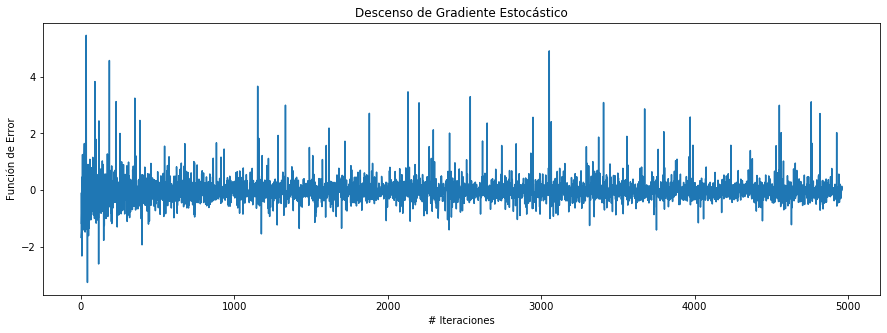

In [29]:
plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')

En los resultados se puede observar una R de 0.6621 para el entrenamiento y de 0.6732 para la prueba, un R mayor a 0.5, lo que indica que existe relación lineal entre las variables utilizadas. Además en la gráfica se observa que la curva de ganancia es buena, debido a que el error baja rápidamente a valores cercanos a 0 y se mantiene oscilando hasta llegar a el valor que se especificó con la variable eps.